<span><br><br><br></span>

<h1 align='center' style='margin-bottom: 0px'>The state of Food Security in Sub-Saharan Africa</h1>
<h3 align='center' style='margin-top: 10px'> The analysis off the effects of environmental hazards and food security in Sub-Saharan Africa</h3>

In [237]:
import plotly
plotly.tools.set_credentials_file(username='robdregmans', api_key='zgwY480qDZBEkGhJOHZD')

In [ ]:
from IPython.display import Image
Image(filename='Report afbeelding 1.jpg')


<h4 align='right', style='margin-bottom': 0px'> 27 October 2018, The Hague</h4>
<h4 align='right', style='margin-top: 3px'> Ivar Tjallingii, Rob Dregmans, Martijn van Vliet</h4>

In [112]:
#Setting up the working environment
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import itertools
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go

import plotly as pyp
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
#for Ivar
os.chdir("C://Users//ivarnieuwepc//Documents//GitHub//Data")

In [113]:
#for Rob
os.chdir("C:\\Users\\Rob\\Documents\\GitHub\\data")

In [ ]:
#for Martijn
os.chdir('/Users/Martijn/Documents/GitHub/data')

<h2 align='left' style='margin-bottom: 0px'>Table of Contents</h2>
<h4 align='left' style='margin-top: 20px'>   - Chapter 1 - Introduction to food security in Sub-Saharan Africa</h4>
<h4 align='left' style='margin-top: 5px'> - Chapter 2 - Methodology & Research questions</h4>
<h4 align='left' style='margin-top: 5px'> - Chapter 3 - Data Preparation</h4>
<h4 align='left' style='margin-top: 5px'> - Chapter 4 - Data Analysis</h4>
<h4 align='left' style='margin-top: 5px'> - Chapter 5 - Policy recommendation</h4>


<h2 align='left' style='margin-bottom: 0px'>Chapter 1 - Introduction to food security in Sub-Saharan Africa</h2>
<h3 align='left' style='margin-bottom: 0px'>United Nations targets</h3>
The reduction of hunger around the world is Sustainable Development Goal (SDG) number 2 of the total seventeen SDG's set up in the 2030 Agenda for Sustainable Development, adopted by all United Nations Member States in 2015. These goals provides a shared blueprint for peace and prosperity for people and the planet. According to the UN targets, need to rethink how we grow, share and consume our food. Only then agriculture, forestry and fisheries can provide food for all people around the world and generate decent incomes, while supporting people-centered rural development and protecting the environment.

#### To act on this goal to obtain enough food for everyone, five main targets have been set out for 2030 by all United Nations Member Sates:

- 2.1: End hunger and ensure access by all people, in particular the poor and people in vulnerable situations, including infants, to safe, nutritious and sufficient food all year round.

- 2.2: End all forms of malnutrition, including achieving, by 2025, the internationally agreed targets on stunting and wasting in children under 5 years of age, and address the nutritional needs of adolescent girls, pregnant and lactating women and older persons.

- 2.3: Double the agricultural productivity and incomes of small-scale food producers, in particular women, indigenous peoples, family farmers, pastoralists and fishers, including through secure and equal access to land, other productive resources and inputs, knowledge, financial services, markets and opportunities for value addition and non-farm employment.

- 2.4: Ensure sustainable food production systems and implement resilient agricultural practices that increase productivity and production, that help maintain ecosystems, that strengthen capacity for adaptation to climate change, extreme weather, drought, flooding and other disasters and that progressively improve land and soil quality.

- 2.5: Maintain the genetic diversity of seeds, cultivated plants and farmed and domesticated animals and their related wild species, including through soundly managed and diversified seed and plant banks at the national, regional and international levels, and promote access to and fair and equitable sharing of benefits arising from the utilization of genetic resources and associated traditional knowledge, as internationally agreed.

Sources:
- https://www.un.org/sustainabledevelopment/hunger/
- https://sustainabledevelopment.un.org/?menu=1300
- http://www.fao.org/state-of-food-security-nutrition/en/

<h2 align='left' style='margin-bottom: 0px'>Chapter 2 - Methodology & Research questions</h2>
<h3 align='left' style='margin-bottom: 0px'>Methodology</h3>
<h3 align='left' style='margin-bottom: 0px'>Research questions</h3>

<h4 align='left' style='margin-bottom: 0px'>Main research question</h4>

- To what extent is hunger in sub-Saharan Africa related to environmental hazards and how will this trend develop until 2030 under the effects of climate change?
<h4 align='left' style='margin-bottom: 0px'>Subquestions</h4>

- How did food security develop in the last decades (for sub-Saharan Africa)?

- What has been the historic trend of environmental hazards in sub-Saharan Africa?

- What is the impact of environmental hazard on the food systems? 

- How will the change in environmental hazards affect the food production output? (make some kind of and regresion model)

- Which policies could counteract these negative effects on food production?



<h2 align='left' style='margin-bottom: 0px'>Chapter 3 - Data Preparation</h2>

For our analyses to answer our research question we use among others the WDI Data. However, the WDI Data is from all the countries over the world and all the regions. Since we only need the countries in Sub-Saharan Africa and the region Sub-Saharan Africa itself (this is just the average of all the countries in Sub-Saharan Africa) we need to select only those data. To compare Sub-Saharan Africa we also included the region 'World'.
Unfortenaly the WDI Data does not contain the data about the region of every country, so we cannot, with only the WDI Data, extract all the countries in Sub-Saharan Africa. We use another datafile that contains all the countries and all their regions to extract a list with all the countries in Sub-Saharan Africa. We then use this list to create a DataFrame from the WDI Data containing only the data of those countries and the two regions 'Sub Saharan Africa' (SSF) and 'World' (WLD).

In [114]:
dfc = pd.read_csv("countriescodes.csv", sep = ",", encoding = 'latin-1')
l = dfc[dfc['sub-region'] == "Sub-Saharan Africa"]["alpha-3"]
region = pd.Series(["SSF","WLD"])
l = l.append(region)
WDI = pd.read_csv("WDI/WDIData.csv")
WDI_SSA = WDI[WDI["Country Code"].isin(l)]

No that we have the right DataFrame, we can modify the data further to make it specific to the graphs we want to create. This involves procedures like

- Selecting only one or a few indicators
- Selecting only the regions, or only the countries
- Selecting a time range
- Melting the data in a long format, which is convenient for plotting the data
- Dropping al the rows where the values are missing

It makes sense to melt the data as one of the lasts steps, because in that way you only use computational power for the data that you want to keep. After having the data melted, it is simple to drop the rows with NA values. The indicators, countries and regions we need differ per graph, therefore this is done previous to plotting each graph in chapter 4.


Hier moet Ivar even vertellen over de EM-DAT database en de bewerkingen die die uitgevoerd heeft
Hieronder kan dan daar de code voor worden ingevoegd

<h2 align='left' style='margin-bottom: 0px'>Chapter 4 - Data Analysis</h2>
According to FAO [bron] there are five indicators that tell us how the zero hunger indicators are developing over the past 7 years. We show them below.

In [69]:
#bar charts for hunger indicators
stunting = "SH.STA.STNT.ZS"
wasting = "SH.STA.WAST.ZS"
overweight = "SH.STA.OWGH.ZS"
anemia = "SH.ANM.ALLW.ZS"
exclusive_breastfeeding = "SH.STA.BFED.ZS"
#add all the indicators for zero hunger in a list
li = [["SH.STA.STNT.ZS"],["SH.STA.WAST.ZS"],["SH.STA.OWGH.ZS"],["SH.ANM.ALLW.ZS"],["SH.STA.BFED.ZS"]]
indi = []
#get the data in the right format for all the indicators via a for-loop
for i in range(0,5):
    WDI_SSA_I = WDI_SSA[WDI_SSA["Indicator Code"].isin(li[i])]
    #get all the necessary columns
    SSA_10_17 = pd.concat([WDI_SSA_I.loc[:,'Country Name':'Indicator Code'],WDI_SSA_I.loc[:,'2010':'2017']], axis=1)
    #melt the data into a long format
    melted = pd.melt(SSA_10_17, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")
    #plot indicator over time for one country
    ll = [ 'Sub-Saharan Africa','World']
    #get only the two regions above and sort them
    mc = melted.loc[melted['Country Name'].isin(ll)] 
    mc = mc.sort_values(["Country Name", "Year"])
    #create two traces, for each region 1
    trace1 = go.Bar(
        x = mc[mc["Country Name"] == 'World']["Year"],
        y = mc[mc["Country Name"] == 'World']["Value"],
        name = 'World',
        legendgroup = 'a',
        showlegend = False,
        marker=dict(color='#1f77b4'),
    )
    trace2 = go.Bar(
        x = mc[mc["Country Name"] == 'Sub-Saharan Africa']["Year"],
        y = mc[mc["Country Name"] == 'Sub-Saharan Africa']["Value"],
        name = 'Sub-Saharan Africa',
        legendgroup = 'b',
        showlegend = False,
        marker=dict(color='#ff7f0e'),
    )
    #add the two traces together and add them to indi
    data = [trace1, trace2]   
    indi.append(data)
#plot all the bar charts 
fig = tools.make_subplots(rows=1, cols=5, subplot_titles=('Stunting', 'Wasting', 'Overweight', 'Anemia', 'Exclusive Breastfeeding'), print_grid = False)
for i in range(0,5):
    fig.append_trace(indi[i][0], 1, i+1)
    fig.append_trace(indi[i][1], 1, i+1)
fig['layout'].update(height=300, width=900, title='Indicators for zero hunger from 2010 till 2017')
py.iplot(fig, filename='zero-hunger-indicators')

Uitleg over de begrippen en observaties 

Stuk van Martijn

In [243]:
df = pd.melt(WDI_SSA,id_vars = ["Country Name","Country Code","Indicator Name","Indicator Code"], var_name = "Years")
# Sort the values first by Country Name and then by Years
df = df.sort_values(["Country Name", "Years"])

In [244]:
def data_return(indicator_code, mode):
    df_und = df[df["Indicator Code"] == indicator_code]
    df_und = df_und.dropna()
    x = df_und[df_und["Country Name"] == 'World']["Years"]
    y1 = df_und[df_und["Country Name"] == 'World']["value"]
    y2 = df_und[df_und["Country Name"] == 'Sub-Saharan Africa']["value"]

    trace0 = go.Scatter(
        x = x,
        y = y1,
        mode = mode,
        name = "World"
        )
    trace1 = go.Scatter(
        x = x,
        y = y2,
        mode = mode,
        name = "Sub-Saharan Africa"
    )
    data = [trace0,trace1]
    return data

In [245]:
def data_plot(indicator_code,title,ytitle,yrange, mode):
    data = data_return(indicator_code, mode)
    
    layout = dict(title = title,
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = ytitle,
                          range = [0,yrange]),
              )

    fig = dict(data=data, layout=layout)
    plot = py.iplot(fig, filename='line-mode')
    return plot

In [246]:
data_plot(indicator_code ='SN.ITK.DEFC.ZS',
          title = 'Undernourishment in Sub-Saharan Africa vs. the World',
          ytitle = '% Undernourishment',
          yrange = 30,
          mode = "lines + markers")

In [259]:
data_plot(indicator_code = 'AG.YLD.CREL.KG',
          title = 'Cereal Yield in Sub-Saharan Africa vs. the World',
          ytitle = 'Cereal Yield (kg per hectare)',
          yrange = 4500,
          mode = "lines + markers")

In [260]:
data_plot(indicator_code ='SN.ITK.DFCT',
          title = 'Depth of the food deficit in Sub-Saharan Africa and the World',
          ytitle = 'Kilocalories per person per day',
          yrange = 250,
          mode = "lines + markers")

We are interested in if there are any differences between population growth and the development of food production. Is food production for example lacking behind on population growth? Or is the food production growing faster than the population growth and is that why the food deficit is declining?
To get more insight, we first plot below the population growth and food production growth (as an index) of Sub-Saharan Africa and include the World for comparison.

In [249]:
pop = data_return('SP.POP.TOTL', "lines")
pro = data_return('AG.PRD.FOOD.XD', "lines")
fig = tools.make_subplots(rows=1, cols=2, shared_xaxes=True, subplot_titles=('Population', 'Food Production'), print_grid = False)
for i in range(0,2):
    fig.append_trace(pop[i], 1,1)
    fig.append_trace(pro[i], 1,2)
fig['layout'].update(height=500, width=950, title='Development of Population versus food production', showlegend = False)
py.iplot(fig, filename='line-mode')

If we then want to check if there is a difference in population versus production we can compare the changes over the years. To do this for Sub-Saharan Africa, we first extract the data about the two indicators for Sub-Saharan Africa. Then we calculate the percentual change by diving year t=1 by year t=0, etc. We do this for both indicators and then divide the change of both indicators by each other over the years. We see the result in the graph below. A point above 1 means that the rate of change in population was that year higher than the change of rate in food production. For a point below 1 it is vica versa. We can conclude that the differences are marginal (the numbers swing between 0.95 and 1.04) and therefor that there is no abnormal difference between population growth and food production growth.

In [248]:
dfi = df[df["Indicator Code"] == 'SP.POP.TOTL']
dfi = dfi.dropna()
x = dfi[dfi["Country Name"] == 'World']["Years"]
ysp = dfi[dfi["Country Name"] == 'Sub-Saharan Africa']["value"]
dfi = df[df["Indicator Code"] == 'AG.PRD.FOOD.XD']
dfi = dfi.dropna()
x = dfi[dfi["Country Name"] == 'World']["Years"]
yag = dfi[dfi["Country Name"] == 'Sub-Saharan Africa']["value"]
lysp = []
for i in range(0,len(x)-1):
    change = ysp.iloc[i+1]/ysp.iloc[i]
    lysp.append(change)    
lyag = []
for i in range(0,len(x)-1):
    change = yag.iloc[i+1]/yag.iloc[i]
    lyag.append(change)
lyto = []
for i in range(0,len(lysp)):
    change = lysp[i]/lyag[i]
    lyto.append(change)
trace = go.Scatter(
    x = x,
    y = lyto,
    mode = 'lines',
    name = 'rate of change of population over rate of change of food production'
)
layout = dict(title = 'Rate of change of population over rate of change of food production',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Ratio'),
             )
fig = dict(data = [trace], layout = layout)
py.iplot(fig, filename='zero-hunger-indicators')


In [250]:
def create_map_undernourishment(year):
    df_map = df[df["Indicator Code"] == 'SN.ITK.DEFC.ZS']
    df_map = df_map[df_map["Years"] == year]

    scl = [[0.0, 'rgb(255,127,80)'],[0.2, 'rgb(255,99,71)'],[0.4, 'rgb(255,0,0)'],\
            [0.6, 'rgb(220,20,60)'],[1, 'rgb(178,34,34)']]

    df_map['text'] = df_map['Country Name']

    data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_map['Country Code'],
        z = df_map['value'],
        locationmode = 'ISO-3',
        text = df_map['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 1
            ) ),
        colorbar = dict(
            title = "% Undernourishment")
        ) ]

    layout = dict(
        title = 'Undernourishment in Sub-Saharan Africa in the year ' + year,
        geo = dict(
            scope='africa',
            showlakes = True,
            lakecolor = 'rgb(135,206,235)',
            showland = True,
            landcolor = 'rgb(220,220,220)')
             )
    
    fig = dict( data=data, layout=layout )
    plot = py.iplot( fig, filename='d3-cloropleth-map' )
    return plot

In [251]:
create_map_undernourishment('2000')

In [252]:
df_emd = pd.read_csv('disaster_data_africa_1960_2018_conv.csv', sep = ';', encoding = 'latin-1')
frec = df_emd.groupby(["year", "disaster type"])[['disaster type']].count()
frec = frec.rename({'disaster type':'frequency'}, axis='columns')
frec2 = df_emd.groupby( [ "year", "disaster type"] ).size().reset_index()
frec2.columns = ['year', 'type', 'frequency']
#selecting impact per type basis of costs, death and affected people
df_emd.columns = ['year', 'type', 'iso', ' country_name', 'occurrence',
       'Total deaths', 'Injured', 'Affected', 'Homeless', 'Total affected',
       'Total damage (US$)'] 
impact = df_emd.groupby(["year","type"])[['Total deaths','Total affected','Total damage (US$)']].sum().reset_index()
total_damage = impact.groupby(["year"]).sum().reset_index()
total_frequency = frec2.groupby(["year"]).sum().reset_index()

#different types of hazards
types = ["Flood","Landslide","Storm","Drought","Wildfire","Extreme temperature"]

#setting up a red color palette for the data points
start_color = "rgb(204,142,142)"
color_dict = {}
type(start_color[12:15])
for i in range(len(types)):
    k = int(start_color[12:15]) - 20 * i
    m = int(start_color[8:11]) - 20* i
    new_value = start_color[0:8] + str(m) + ',' + str(k) + ')'
    color_dict[types[i]] = new_value
color_dict["Drought"] = "rgb(30,144,255)"

In [253]:
def regression_path(regression_data, y_column, order):
    rg=sns.regplot(y = y_column, x = "year", data = regression_data.astype(int), order = order)
    x=rg.get_lines()[0].get_xdata()       # x-coordinate of points along the regression line
    y=rg.get_lines()[0].get_ydata()       # y-coordinate of regression line
    P=rg.get_children()[1].get_paths()    #The list of Path(s) bounding the shape of 95% confidence interval-transparent
    p_codes={1:'M', 2: 'L', 79: 'Z'}      #dict to get the Plotly codes for commands to define the svg path
    path=''
    for s in P[0].iter_segments():
        c=p_codes[s[1]]
        xx, yy=s[0]
        path+=c+str('{:.5f}'.format(xx))+' '+str('{:.5f}'.format(yy))
    shapes=[dict(type='path',
             path=path,
             line=dict(width=0.1,color = color_dict[i]),
             fillcolor='rgb(30,144,255)')]   
    Regression = go.Scatter(
        x = x,
        y = y,
        mode = "lines",
        name = "Regression",
        line = dict(color = 'rgb(30,144,255)', width = 1))
    return Regression, path

In [254]:
def add_layout(title, ytitle, yrangemin, yrangemax):
    layout = go.Layout(
        shapes = [ 
            dict(
                fillcolor = 'rgba(127,127,127,0.10)', 
                line = dict(color = 'rgb(127,127,127)', width = 0.1), 
                path = path,
                type = "path")
                 ],
        title = title,        
        xaxis = dict(
            gridcolor = "rgb(255,255,255)", 
            mirror = False, 
            range = [1960,2020],
            title = "Year",
            zeroline = False,
        ),
        yaxis=dict(
            range = [yrangemin,yrangemax],
            title = ytitle,
            gridcolor='rgb(255,255,255)',
            showgrid=True,
            showline=False,
            showticklabels=True,
            tickcolor='rgb(127,127,127)',
            ticks='outside',
            zeroline=False
        ),
     )
    return layout

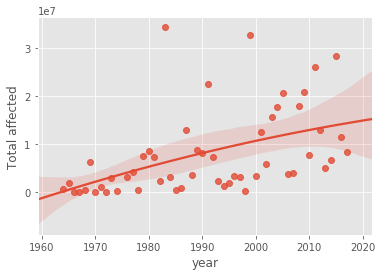

In [255]:
traces = []
for i in types:
    x = list(impact[impact.type == i]['year'])
    y = list(impact[impact.type == i]['Total affected'])
    trace = go.Scatter(
        x = x,
        y = y,
        mode = "markers",
        name = i,
        line=dict(width=0.1,color = color_dict[i]))
    traces.append(trace)  
    
regression_data_drought = pd.DataFrame({"Total affected" : list(impact[impact.type == "Drought"]['Total affected']), "year" : list(impact[impact.type == "Drought"]['year'])})

(Drought_Regression, path) = regression_path(regression_data_drought,"Total affected",2)

layout = add_layout("Disasters in Africa by total affected population <br> Regression line and  95%-confidence interval for Droughts",'Total Affected',0,35000000)

traces.append(Drought_Regression)    
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='zero-hunger-indicators')

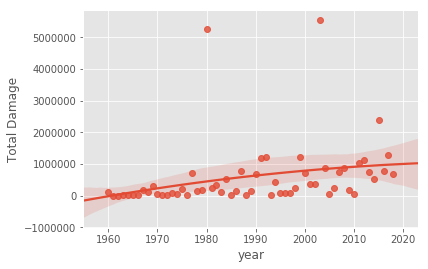

In [256]:
x = list(total_damage['year'])
y = list(total_damage['Total damage (US$)'])

trace = go.Scatter(
        x = x,
        y = y,
        mode = "markers",
        name = 'Damage',
        line=dict(width=0.1,color = 'red'))
        
regression_data_damage = pd.DataFrame({"Total Damage" : list(total_damage['Total damage (US$)']), "year" : list(total_damage['year'])})

(regression, path) = regression_path(regression_data_damage,"Total Damage",2)
layout = add_layout("Disasters in Africa by total damage <br> Regression line and  95%-confidence interval for total damage per year",'Total damage in US dollars ($)',-100000,1500000)

data = [trace, regression]     
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='zero-hunger-indicators')

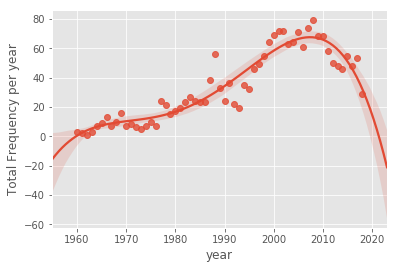

In [257]:
x = list(total_frequency['year'])
y = list(total_frequency['frequency'])

trace = go.Scatter(
        x = x,
        y = y,
        mode = "markers",
        name = 'Damage',
        line=dict(width=0.1,color = 'red'))
        
regression_data_damage = pd.DataFrame({"Total Frequency per year" : list(total_frequency['frequency']), "year" : list(total_frequency['year'])})

(regression, path) = regression_path(regression_data_damage,"Total Frequency per year",4)
layout = add_layout("Total frequency of environmental hazards with regression",'Total damage in US dollars ($)',0,100)

data = [trace, regression]     
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='zero-hunger-indicators')

In [258]:
data = [go.Bar(
            x=["low extreme","high extreme"],
            y=[135874820, 593711026],
            name='Absolute'),
        go.Scatter(
            x=["low extreme","high extreme"],
            y=[14.05,16.78],
            name='Percentage',
            mode = "markers",
            marker=dict(line=dict(color='rgb(255, 127, 14)', width=10)),
            yaxis = 'y2')]
layout = go.Layout(
            title='Higher number of undernourished people in countries with climate extremes',
            yaxis=dict(title= 'Absolute', range = [0,700000000], titlefont= dict(color='rgb(31, 119, 180)'),tickfont=dict(color='rgb(31, 119, 180)'),),
            yaxis2=dict(title='Percentage', showgrid=False, range = [13,16.9], titlefont= dict(color='rgb(255, 127, 14)'),
            tickfont=dict(color='rgb(255, 127, 14)'), 
            overlaying='y',
            anchor='free',
            side='right',
            position=1)
            )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='zero-hunger-indicators')